## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   4.914150  1738.736485  0.117331  6.257399  1.579096
1   9.820247   384.799695  0.434333  5.554899  1.521314
2  68.901729   748.454642  0.801610  4.307221  1.494463
3  91.832282  1097.770109  0.379250  8.640738  1.158020
4  32.344606   471.625041  0.282192  5.453598  1.232316


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.90583 | train_mse: 2.99805 | train_mae: 1.33617 |  0:00:00s
epoch 1  | loss: 0.6259  | train_mse: 1.84021 | train_mae: 1.11044 |  0:00:00s
epoch 2  | loss: 0.59288 | train_mse: 2.01706 | train_mae: 1.17096 |  0:00:00s


epoch 3  | loss: 0.5864  | train_mse: 2.21493 | train_mae: 1.1667  |  0:00:00s
epoch 4  | loss: 0.49483 | train_mse: 1.61802 | train_mae: 0.96866 |  0:00:00s
epoch 5  | loss: 0.35506 | train_mse: 1.64041 | train_mae: 0.9904  |  0:00:00s


epoch 6  | loss: 0.29289 | train_mse: 1.52345 | train_mae: 0.96446 |  0:00:00s
epoch 7  | loss: 0.2455  | train_mse: 0.90721 | train_mae: 0.72438 |  0:00:00s
epoch 8  | loss: 0.32238 | train_mse: 0.7977  | train_mae: 0.67481 |  0:00:00s


epoch 9  | loss: 0.39504 | train_mse: 1.11738 | train_mae: 0.78304 |  0:00:00s
epoch 10 | loss: 0.28732 | train_mse: 1.21661 | train_mae: 0.83633 |  0:00:00s
epoch 11 | loss: 0.27827 | train_mse: 1.05046 | train_mae: 0.76774 |  0:00:01s


epoch 12 | loss: 0.3413  | train_mse: 0.73821 | train_mae: 0.66658 |  0:00:01s
epoch 13 | loss: 0.16462 | train_mse: 0.64132 | train_mae: 0.61613 |  0:00:01s
epoch 14 | loss: 0.22716 | train_mse: 0.59438 | train_mae: 0.59058 |  0:00:01s
epoch 15 | loss: 0.23929 | train_mse: 0.50965 | train_mae: 0.55559 |  0:00:01s


epoch 16 | loss: 0.26103 | train_mse: 0.47292 | train_mae: 0.52497 |  0:00:01s
epoch 17 | loss: 0.19945 | train_mse: 0.40561 | train_mae: 0.47886 |  0:00:01s


epoch 18 | loss: 0.23457 | train_mse: 0.47949 | train_mae: 0.51106 |  0:00:01s
epoch 19 | loss: 0.17712 | train_mse: 0.47331 | train_mae: 0.51094 |  0:00:01s
epoch 20 | loss: 0.19986 | train_mse: 0.34998 | train_mae: 0.45465 |  0:00:01s
epoch 21 | loss: 0.20491 | train_mse: 0.39236 | train_mae: 0.46327 |  0:00:01s


epoch 22 | loss: 0.2042  | train_mse: 0.34441 | train_mae: 0.44497 |  0:00:01s
epoch 23 | loss: 0.18901 | train_mse: 0.46237 | train_mae: 0.49285 |  0:00:01s
epoch 24 | loss: 0.19851 | train_mse: 0.58609 | train_mae: 0.51398 |  0:00:02s
epoch 25 | loss: 0.20768 | train_mse: 0.4895  | train_mae: 0.50115 |  0:00:02s


epoch 26 | loss: 0.24448 | train_mse: 0.45433 | train_mae: 0.49269 |  0:00:02s
epoch 27 | loss: 0.28685 | train_mse: 0.48202 | train_mae: 0.51136 |  0:00:02s
epoch 28 | loss: 0.18777 | train_mse: 0.31295 | train_mae: 0.42541 |  0:00:02s
epoch 29 | loss: 0.40326 | train_mse: 0.20825 | train_mae: 0.3594  |  0:00:02s


epoch 30 | loss: 0.21717 | train_mse: 0.18833 | train_mae: 0.34148 |  0:00:02s
epoch 31 | loss: 0.26471 | train_mse: 0.33968 | train_mae: 0.43725 |  0:00:02s
epoch 32 | loss: 0.16576 | train_mse: 0.34727 | train_mae: 0.43618 |  0:00:02s
epoch 33 | loss: 0.18179 | train_mse: 0.2186  | train_mae: 0.3587  |  0:00:02s


epoch 34 | loss: 0.11278 | train_mse: 0.19421 | train_mae: 0.33139 |  0:00:02s
epoch 35 | loss: 0.17974 | train_mse: 0.16393 | train_mae: 0.30705 |  0:00:02s
epoch 36 | loss: 0.16473 | train_mse: 0.15675 | train_mae: 0.3048  |  0:00:02s


epoch 37 | loss: 0.21613 | train_mse: 0.12913 | train_mae: 0.27453 |  0:00:02s
epoch 38 | loss: 0.11993 | train_mse: 0.14492 | train_mae: 0.29363 |  0:00:03s
epoch 39 | loss: 0.15418 | train_mse: 0.22295 | train_mae: 0.34906 |  0:00:03s
epoch 40 | loss: 0.14893 | train_mse: 0.25653 | train_mae: 0.37214 |  0:00:03s


epoch 41 | loss: 0.11719 | train_mse: 0.22029 | train_mae: 0.34075 |  0:00:03s
epoch 42 | loss: 0.14065 | train_mse: 0.18445 | train_mae: 0.32105 |  0:00:03s
epoch 43 | loss: 0.14872 | train_mse: 0.13376 | train_mae: 0.27682 |  0:00:03s
epoch 44 | loss: 0.11389 | train_mse: 0.14993 | train_mae: 0.2946  |  0:00:03s


epoch 45 | loss: 0.26176 | train_mse: 0.15308 | train_mae: 0.29242 |  0:00:03s
epoch 46 | loss: 0.16386 | train_mse: 0.10994 | train_mae: 0.25349 |  0:00:03s
epoch 47 | loss: 0.10497 | train_mse: 0.10284 | train_mae: 0.25426 |  0:00:03s


epoch 48 | loss: 0.20409 | train_mse: 0.11302 | train_mae: 0.25719 |  0:00:03s
epoch 49 | loss: 0.13618 | train_mse: 0.12652 | train_mae: 0.26951 |  0:00:03s


epoch 50 | loss: 0.11126 | train_mse: 0.13979 | train_mae: 0.29306 |  0:00:03s
epoch 51 | loss: 0.13539 | train_mse: 0.17932 | train_mae: 0.33091 |  0:00:04s
epoch 52 | loss: 0.24021 | train_mse: 0.21621 | train_mae: 0.35651 |  0:00:04s


epoch 53 | loss: 0.12008 | train_mse: 0.17624 | train_mae: 0.33719 |  0:00:04s
epoch 54 | loss: 0.13647 | train_mse: 0.1515  | train_mae: 0.31709 |  0:00:04s
epoch 55 | loss: 0.16117 | train_mse: 0.13897 | train_mae: 0.29528 |  0:00:04s


epoch 56 | loss: 0.13537 | train_mse: 0.11791 | train_mae: 0.27002 |  0:00:04s
epoch 57 | loss: 0.13764 | train_mse: 0.10311 | train_mae: 0.25818 |  0:00:04s
epoch 58 | loss: 0.13989 | train_mse: 0.09686 | train_mae: 0.23741 |  0:00:04s


epoch 59 | loss: 0.10654 | train_mse: 0.07896 | train_mae: 0.21475 |  0:00:04s
epoch 60 | loss: 0.10135 | train_mse: 0.08584 | train_mae: 0.22268 |  0:00:04s
epoch 61 | loss: 0.1155  | train_mse: 0.10186 | train_mae: 0.23896 |  0:00:04s


epoch 62 | loss: 0.15945 | train_mse: 0.09961 | train_mae: 0.23329 |  0:00:04s
epoch 63 | loss: 0.35389 | train_mse: 0.09492 | train_mae: 0.23218 |  0:00:05s


epoch 64 | loss: 0.18096 | train_mse: 0.11208 | train_mae: 0.24327 |  0:00:05s
epoch 65 | loss: 0.15362 | train_mse: 0.11222 | train_mae: 0.25008 |  0:00:05s
epoch 66 | loss: 0.1128  | train_mse: 0.11179 | train_mae: 0.25658 |  0:00:05s


epoch 67 | loss: 0.14935 | train_mse: 0.08918 | train_mae: 0.23157 |  0:00:05s
epoch 68 | loss: 0.18142 | train_mse: 0.08028 | train_mae: 0.2202  |  0:00:05s
epoch 69 | loss: 0.10746 | train_mse: 0.11908 | train_mae: 0.26253 |  0:00:05s
epoch 70 | loss: 0.18913 | train_mse: 0.16257 | train_mae: 0.29269 |  0:00:05s


epoch 71 | loss: 0.09185 | train_mse: 0.16839 | train_mae: 0.2994  |  0:00:05s
epoch 72 | loss: 0.15426 | train_mse: 0.12338 | train_mae: 0.2553  |  0:00:06s
epoch 73 | loss: 0.15049 | train_mse: 0.07925 | train_mae: 0.21383 |  0:00:06s
epoch 74 | loss: 0.11188 | train_mse: 0.10591 | train_mae: 0.23856 |  0:00:06s


epoch 75 | loss: 0.07669 | train_mse: 0.19352 | train_mae: 0.33308 |  0:00:06s
epoch 76 | loss: 0.12845 | train_mse: 0.14993 | train_mae: 0.29186 |  0:00:06s
epoch 77 | loss: 0.10642 | train_mse: 0.08016 | train_mae: 0.21637 |  0:00:06s


epoch 78 | loss: 0.10663 | train_mse: 0.07595 | train_mae: 0.20614 |  0:00:06s
epoch 79 | loss: 0.16689 | train_mse: 0.08352 | train_mae: 0.21308 |  0:00:06s
epoch 80 | loss: 0.17226 | train_mse: 0.07777 | train_mae: 0.20455 |  0:00:06s
epoch 81 | loss: 0.25619 | train_mse: 0.07664 | train_mae: 0.21451 |  0:00:06s
epoch 82 | loss: 0.13625 | train_mse: 0.07891 | train_mae: 0.21691 |  0:00:06s


epoch 83 | loss: 0.16095 | train_mse: 0.07024 | train_mae: 0.20085 |  0:00:06s
epoch 84 | loss: 0.13077 | train_mse: 0.07432 | train_mae: 0.2105  |  0:00:06s
epoch 85 | loss: 0.09523 | train_mse: 0.08134 | train_mae: 0.22135 |  0:00:06s


epoch 86 | loss: 0.10775 | train_mse: 0.08161 | train_mae: 0.22116 |  0:00:06s
epoch 87 | loss: 0.15434 | train_mse: 0.07384 | train_mae: 0.21216 |  0:00:07s
epoch 88 | loss: 0.15989 | train_mse: 0.07123 | train_mae: 0.20914 |  0:00:07s
epoch 89 | loss: 0.09935 | train_mse: 0.07438 | train_mae: 0.20913 |  0:00:07s


epoch 90 | loss: 0.18054 | train_mse: 0.08174 | train_mae: 0.2233  |  0:00:07s
epoch 91 | loss: 0.07282 | train_mse: 0.06707 | train_mae: 0.20365 |  0:00:07s
epoch 92 | loss: 0.13587 | train_mse: 0.07454 | train_mae: 0.22202 |  0:00:07s
epoch 93 | loss: 0.12938 | train_mse: 0.06323 | train_mae: 0.2025  |  0:00:07s


epoch 94 | loss: 0.16829 | train_mse: 0.08227 | train_mae: 0.22597 |  0:00:07s
epoch 95 | loss: 0.11493 | train_mse: 0.08417 | train_mae: 0.22031 |  0:00:07s
epoch 96 | loss: 0.09291 | train_mse: 0.06675 | train_mae: 0.19601 |  0:00:07s
epoch 97 | loss: 0.0883  | train_mse: 0.06625 | train_mae: 0.1998  |  0:00:07s


epoch 98 | loss: 0.12228 | train_mse: 0.06895 | train_mae: 0.20796 |  0:00:07s
epoch 99 | loss: 0.07537 | train_mse: 0.07035 | train_mae: 0.21347 |  0:00:07s
epoch 100| loss: 0.09555 | train_mse: 0.07146 | train_mae: 0.21021 |  0:00:07s


epoch 101| loss: 0.12202 | train_mse: 0.05946 | train_mae: 0.19593 |  0:00:08s
epoch 102| loss: 0.07941 | train_mse: 0.0507  | train_mae: 0.17952 |  0:00:08s
epoch 103| loss: 0.11899 | train_mse: 0.04972 | train_mae: 0.17254 |  0:00:08s


epoch 104| loss: 0.104   | train_mse: 0.06061 | train_mae: 0.18687 |  0:00:08s
epoch 105| loss: 0.06434 | train_mse: 0.06859 | train_mae: 0.19847 |  0:00:08s
epoch 106| loss: 0.1102  | train_mse: 0.06053 | train_mae: 0.17962 |  0:00:08s
epoch 107| loss: 0.1133  | train_mse: 0.08216 | train_mae: 0.20198 |  0:00:08s


epoch 108| loss: 0.11656 | train_mse: 0.0975  | train_mae: 0.22067 |  0:00:08s
epoch 109| loss: 0.08564 | train_mse: 0.08847 | train_mae: 0.21206 |  0:00:08s
epoch 110| loss: 0.10225 | train_mse: 0.08359 | train_mae: 0.21524 |  0:00:08s
epoch 111| loss: 0.0827  | train_mse: 0.07514 | train_mae: 0.21614 |  0:00:08s


epoch 112| loss: 0.08642 | train_mse: 0.0561  | train_mae: 0.18955 |  0:00:08s
epoch 113| loss: 0.09257 | train_mse: 0.04566 | train_mae: 0.16442 |  0:00:08s
epoch 114| loss: 0.16116 | train_mse: 0.05228 | train_mae: 0.17319 |  0:00:08s


epoch 115| loss: 0.08468 | train_mse: 0.06623 | train_mae: 0.182   |  0:00:08s
epoch 116| loss: 0.14941 | train_mse: 0.05849 | train_mae: 0.16726 |  0:00:09s
epoch 117| loss: 0.09247 | train_mse: 0.06709 | train_mae: 0.199   |  0:00:09s
epoch 118| loss: 0.15308 | train_mse: 0.07221 | train_mae: 0.20995 |  0:00:09s


epoch 119| loss: 0.16746 | train_mse: 0.08395 | train_mae: 0.22153 |  0:00:09s
epoch 120| loss: 0.18385 | train_mse: 0.09016 | train_mae: 0.22987 |  0:00:09s
epoch 121| loss: 0.10836 | train_mse: 0.08312 | train_mae: 0.22676 |  0:00:09s
epoch 122| loss: 0.11419 | train_mse: 0.07483 | train_mae: 0.21848 |  0:00:09s


epoch 123| loss: 0.08327 | train_mse: 0.07315 | train_mae: 0.21953 |  0:00:09s
epoch 124| loss: 0.09301 | train_mse: 0.06509 | train_mae: 0.20877 |  0:00:09s
epoch 125| loss: 0.09935 | train_mse: 0.06328 | train_mae: 0.20489 |  0:00:09s


epoch 126| loss: 0.15223 | train_mse: 0.07474 | train_mae: 0.22469 |  0:00:09s
epoch 127| loss: 0.11954 | train_mse: 0.0717  | train_mae: 0.21941 |  0:00:09s
epoch 128| loss: 0.20754 | train_mse: 0.08101 | train_mae: 0.23208 |  0:00:09s


epoch 129| loss: 0.0974  | train_mse: 0.0744  | train_mae: 0.22694 |  0:00:09s
epoch 130| loss: 0.08479 | train_mse: 0.07074 | train_mae: 0.20695 |  0:00:10s
epoch 131| loss: 0.10578 | train_mse: 0.06679 | train_mae: 0.20124 |  0:00:10s


epoch 132| loss: 0.13412 | train_mse: 0.05536 | train_mae: 0.1855  |  0:00:10s
epoch 133| loss: 0.09795 | train_mse: 0.06604 | train_mae: 0.1993  |  0:00:10s
epoch 134| loss: 0.08889 | train_mse: 0.07254 | train_mae: 0.20782 |  0:00:10s


epoch 135| loss: 0.09587 | train_mse: 0.07586 | train_mae: 0.21082 |  0:00:10s
epoch 136| loss: 0.11008 | train_mse: 0.06952 | train_mae: 0.20408 |  0:00:10s
epoch 137| loss: 0.10475 | train_mse: 0.07041 | train_mae: 0.20661 |  0:00:10s


epoch 138| loss: 0.08511 | train_mse: 0.08665 | train_mae: 0.22669 |  0:00:10s
epoch 139| loss: 0.07837 | train_mse: 0.06779 | train_mae: 0.19852 |  0:00:10s
epoch 140| loss: 0.10011 | train_mse: 0.06102 | train_mae: 0.19297 |  0:00:10s
epoch 141| loss: 0.14795 | train_mse: 0.07161 | train_mae: 0.20275 |  0:00:10s


epoch 142| loss: 0.13843 | train_mse: 0.08372 | train_mae: 0.21913 |  0:00:10s
epoch 143| loss: 0.10248 | train_mse: 0.09035 | train_mae: 0.23333 |  0:00:10s
epoch 144| loss: 0.26973 | train_mse: 0.11422 | train_mae: 0.26207 |  0:00:11s


epoch 145| loss: 0.07802 | train_mse: 0.10581 | train_mae: 0.25955 |  0:00:11s
epoch 146| loss: 0.15031 | train_mse: 0.08456 | train_mae: 0.22814 |  0:00:11s
epoch 147| loss: 0.19228 | train_mse: 0.06487 | train_mae: 0.20132 |  0:00:11s


epoch 148| loss: 0.09906 | train_mse: 0.05297 | train_mae: 0.18661 |  0:00:11s
epoch 149| loss: 0.10035 | train_mse: 0.05104 | train_mae: 0.17626 |  0:00:11s
epoch 150| loss: 0.0913  | train_mse: 0.05718 | train_mae: 0.18112 |  0:00:11s


epoch 151| loss: 0.10681 | train_mse: 0.06169 | train_mae: 0.19783 |  0:00:11s
epoch 152| loss: 0.12117 | train_mse: 0.08563 | train_mae: 0.23057 |  0:00:11s
epoch 153| loss: 0.09635 | train_mse: 0.09997 | train_mae: 0.23962 |  0:00:11s


epoch 154| loss: 0.08781 | train_mse: 0.09382 | train_mae: 0.23203 |  0:00:11s
epoch 155| loss: 0.17428 | train_mse: 0.0872  | train_mae: 0.22155 |  0:00:11s
epoch 156| loss: 0.0754  | train_mse: 0.08473 | train_mae: 0.2173  |  0:00:11s


epoch 157| loss: 0.11266 | train_mse: 0.07942 | train_mae: 0.21308 |  0:00:12s
epoch 158| loss: 0.14268 | train_mse: 0.05707 | train_mae: 0.18562 |  0:00:12s
epoch 159| loss: 0.10467 | train_mse: 0.05288 | train_mae: 0.17921 |  0:00:12s
epoch 160| loss: 0.07392 | train_mse: 0.04734 | train_mae: 0.16193 |  0:00:12s


epoch 161| loss: 0.12    | train_mse: 0.05963 | train_mae: 0.18669 |  0:00:12s
epoch 162| loss: 0.10235 | train_mse: 0.05484 | train_mae: 0.17471 |  0:00:12s
epoch 163| loss: 0.16048 | train_mse: 0.05806 | train_mae: 0.19017 |  0:00:12s
epoch 164| loss: 0.07712 | train_mse: 0.06473 | train_mae: 0.19777 |  0:00:12s


epoch 165| loss: 0.10105 | train_mse: 0.05699 | train_mae: 0.18204 |  0:00:12s
epoch 166| loss: 0.1213  | train_mse: 0.05405 | train_mae: 0.17901 |  0:00:12s
epoch 167| loss: 0.12498 | train_mse: 0.05909 | train_mae: 0.19009 |  0:00:12s
epoch 168| loss: 0.08574 | train_mse: 0.06456 | train_mae: 0.19795 |  0:00:12s


epoch 169| loss: 0.07884 | train_mse: 0.10338 | train_mae: 0.24786 |  0:00:12s
epoch 170| loss: 0.0951  | train_mse: 0.12751 | train_mae: 0.27465 |  0:00:12s
epoch 171| loss: 0.14106 | train_mse: 0.09794 | train_mae: 0.24587 |  0:00:12s


epoch 172| loss: 0.16156 | train_mse: 0.07141 | train_mae: 0.2136  |  0:00:13s
epoch 173| loss: 0.10001 | train_mse: 0.05383 | train_mae: 0.1862  |  0:00:13s
epoch 174| loss: 0.14487 | train_mse: 0.0626  | train_mae: 0.20178 |  0:00:13s
epoch 175| loss: 0.09135 | train_mse: 0.09583 | train_mae: 0.23968 |  0:00:13s


epoch 176| loss: 0.14437 | train_mse: 0.09487 | train_mae: 0.23461 |  0:00:13s
epoch 177| loss: 0.12344 | train_mse: 0.0812  | train_mae: 0.21922 |  0:00:13s
epoch 178| loss: 0.09756 | train_mse: 0.08198 | train_mae: 0.20455 |  0:00:13s
epoch 179| loss: 0.11544 | train_mse: 0.1245  | train_mae: 0.26269 |  0:00:13s


epoch 180| loss: 0.13403 | train_mse: 0.07939 | train_mae: 0.21162 |  0:00:13s
epoch 181| loss: 0.11196 | train_mse: 0.06998 | train_mae: 0.21086 |  0:00:13s
epoch 182| loss: 0.11354 | train_mse: 0.06039 | train_mae: 0.19618 |  0:00:13s


epoch 183| loss: 0.06894 | train_mse: 0.07732 | train_mae: 0.20229 |  0:00:13s
epoch 184| loss: 0.14758 | train_mse: 0.0858  | train_mae: 0.2216  |  0:00:14s
epoch 185| loss: 0.0632  | train_mse: 0.07269 | train_mae: 0.20879 |  0:00:14s


epoch 186| loss: 0.1402  | train_mse: 0.06575 | train_mae: 0.20029 |  0:00:14s
epoch 187| loss: 0.07132 | train_mse: 0.06059 | train_mae: 0.19403 |  0:00:14s
epoch 188| loss: 0.15842 | train_mse: 0.05806 | train_mae: 0.18572 |  0:00:14s
epoch 189| loss: 0.06915 | train_mse: 0.06463 | train_mae: 0.18532 |  0:00:14s


epoch 190| loss: 0.08332 | train_mse: 0.07418 | train_mae: 0.19863 |  0:00:14s
epoch 191| loss: 0.08775 | train_mse: 0.10605 | train_mae: 0.24309 |  0:00:14s
epoch 192| loss: 0.11757 | train_mse: 0.08288 | train_mae: 0.21093 |  0:00:14s
epoch 193| loss: 0.08915 | train_mse: 0.0644  | train_mae: 0.18942 |  0:00:14s


epoch 194| loss: 0.16929 | train_mse: 0.07563 | train_mae: 0.21234 |  0:00:14s
epoch 195| loss: 0.1408  | train_mse: 0.06746 | train_mae: 0.20887 |  0:00:14s
epoch 196| loss: 0.09901 | train_mse: 0.06421 | train_mae: 0.20606 |  0:00:14s
epoch 197| loss: 0.09245 | train_mse: 0.05878 | train_mae: 0.19183 |  0:00:14s


epoch 198| loss: 0.16829 | train_mse: 0.05455 | train_mae: 0.179   |  0:00:14s
epoch 199| loss: 0.0882  | train_mse: 0.05463 | train_mae: 0.18015 |  0:00:15s
epoch 200| loss: 0.13098 | train_mse: 0.06303 | train_mae: 0.19242 |  0:00:15s
epoch 201| loss: 0.07442 | train_mse: 0.06726 | train_mae: 0.20622 |  0:00:15s


epoch 202| loss: 0.10932 | train_mse: 0.0587  | train_mae: 0.19169 |  0:00:15s
epoch 203| loss: 0.07145 | train_mse: 0.06055 | train_mae: 0.19879 |  0:00:15s
epoch 204| loss: 0.14535 | train_mse: 0.05592 | train_mae: 0.18874 |  0:00:15s


epoch 205| loss: 0.15083 | train_mse: 0.11153 | train_mae: 0.25705 |  0:00:15s
epoch 206| loss: 0.09561 | train_mse: 0.11654 | train_mae: 0.26138 |  0:00:15s
epoch 207| loss: 0.09049 | train_mse: 0.04718 | train_mae: 0.17137 |  0:00:15s
epoch 208| loss: 0.16225 | train_mse: 0.05291 | train_mae: 0.18213 |  0:00:15s


epoch 209| loss: 0.08852 | train_mse: 0.07816 | train_mae: 0.21621 |  0:00:15s
epoch 210| loss: 0.11293 | train_mse: 0.08081 | train_mae: 0.21729 |  0:00:15s

Early stopping occurred at epoch 210 with best_epoch = 160 and best_train_mae = 0.16193
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

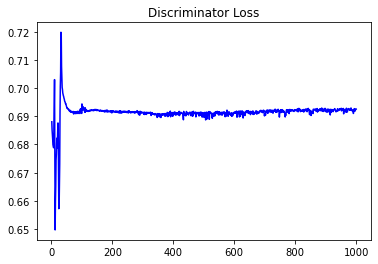

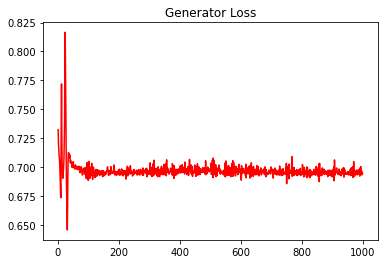

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3978568912561588


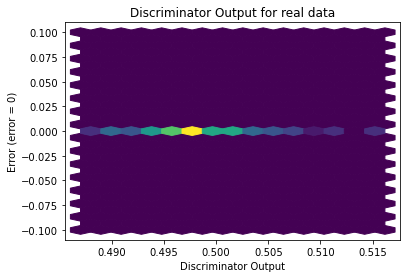

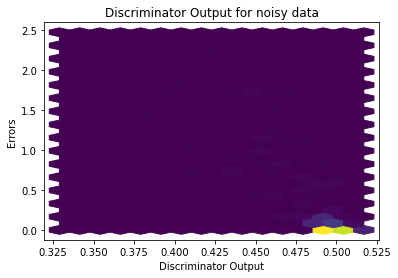

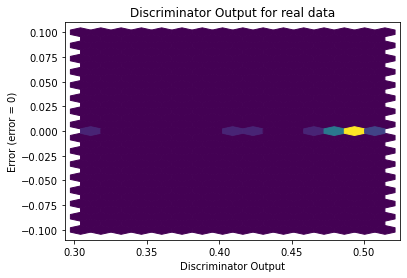

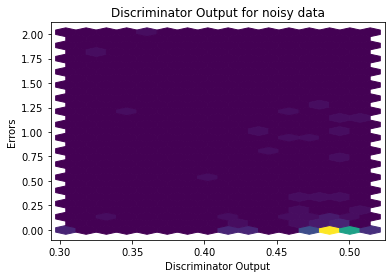

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


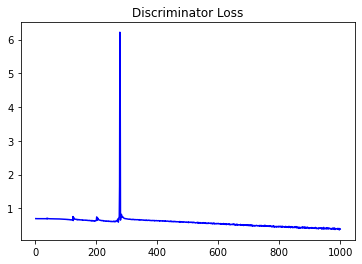

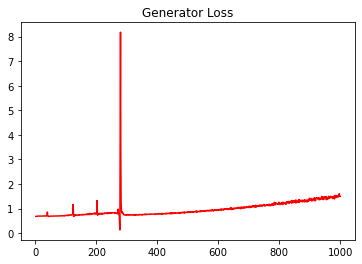

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24901250708289976


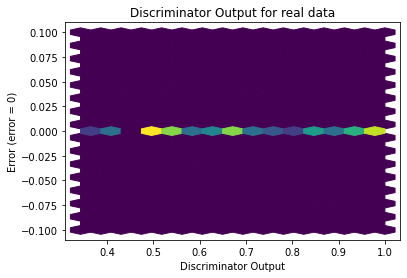

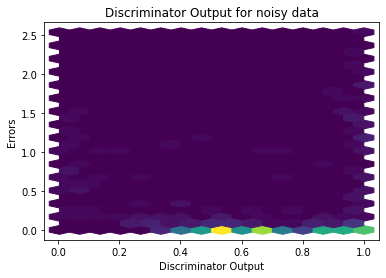

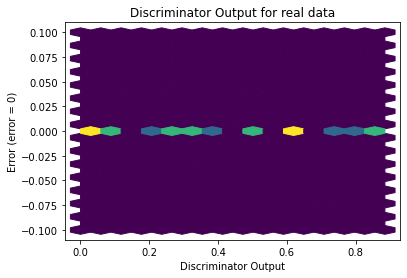

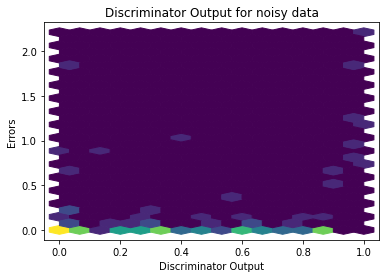

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
